In [2]:
#import libraries
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
import tensorflow_datasets as tfds #data sets...
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
# ImageDataGenerator, array_to_img, img_to_array, load_img

In [3]:
#upload images
# הורדת קובץ ה-ZIP מגוגל דרייב
#https://drive.google.com/file/d//view?usp=sharing
zip_id = "1-0LSuoPPhxqWtFHiMlblZpkyWB4KY7W_"
!gdown --id {zip_id} -O dataset.zip

# חילוץ הקבצים
!unzip dataset.zip -d dataset
print('-'*20+'\n Upload Completed!!\n'+'-'*20)

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1-0LSuoPPhxqWtFHiMlblZpkyWB4KY7W_
From (redirected): https://drive.google.com/uc?id=1-0LSuoPPhxqWtFHiMlblZpkyWB4KY7W_&confirm=t&uuid=6131e1bb-556d-4bb8-9e65-a238ffac3523
To: /content/dataset.zip
100% 101M/101M [00:01<00:00, 59.4MB/s] 
Archive:  dataset.zip
   creating: dataset/test/
   creating: dataset/train/
   creating: dataset/train/ramen/
   creating: dataset/train/sushi/
  inflating: dataset/train/ramen/104981.jpg  
  inflating: dataset/train/ramen/1045249.jpg  
  inflating: dataset/train/ramen/1019927.jpg  
  inflating: dataset/train/ramen/1014141.jpg  
  inflating: dataset/train/ramen/1015129.jpg  
  inflating: dataset/train/ramen/1002843.jpg  
  inflating: dataset/train/ramen/1034646.jpg  
  inflat

In [4]:
#Use Image ImageDataGenerator to create train_datagen and test_datagen
#make sure you rescale all sets
#use a few or all of these options for the training set:
#rotation_range,width_shift_range,height_shift_range,shear_range,zoom_rang,horizontal_flip
train_datagen = ImageDataGenerator(
     rescale=1./255, # rescale values between 0-1
     rotation_range=40, # rotate randomly in a range of 40°
     width_shift_range=0.2, # randomly shifting horizonal in a range
     height_shift_range=0.2, # randomly shifting horizonal in a range
     shear_range=0.2, # shear images in a range
     zoom_range=0.2, # zoom images in a range
     horizontal_flip=True,
     fill_mode='nearest'
 )
# מחולל נתונים לבדיקה (ללא Augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)


In [8]:
#define the train_path and the test_path
train_path = 'dataset/train'
test_path ='dataset/test'

#use flow_from_directory to create train_generator and test_generator
#give it directory, target_sze, batch_size and class_mode (you may also want to use seed =42)
train_generator = train_datagen.flow_from_directory(directory= train_path,

    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    seed=42
)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    seed=42
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [6]:
# Define model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(150,150,3)),
    #conv1
    tf.keras.layers.Conv2D(64, 3, activation='relu'), #,input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    #conv2
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    #flatten
    tf.keras.layers.Flatten(),
    #nn
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 370ms/step - accuracy: 0.4932 - loss: 0.7850 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 292ms/step - accuracy: 0.5253 - loss: 0.6966 - val_accuracy: 0.5240 - val_loss: 0.6908
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 267ms/step - accuracy: 0.5790 - loss: 0.6913 - val_accuracy: 0.6260 - val_loss: 0.6644
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 262ms/step - accuracy: 0.6150 - loss: 0.6641 - val_accuracy: 0.6800 - val_loss: 0.6425
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 261ms/step - accuracy: 0.6787 - loss: 0.6547 - val_accuracy: 0.6960 - val_loss: 0.6258
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 269ms/step - accuracy: 0.6497 - loss: 0.6385 - val_accuracy: 0.6880 - val_loss: 0.5947
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 279ms/step - accuracy: 0.6911 - loss: 0.6036 - val_accuracy: 0.7220 - val_loss: 0.5721
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 260ms/step - accuracy: 0.6810 - loss: 0.5949 - val_accu

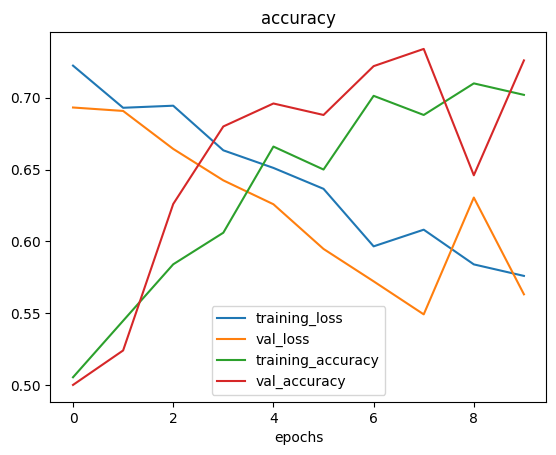

In [9]:
# Compile model
model.compile(
    optimizer=RMSprop(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
              )

# Train model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

# Plt Loss Curves
plt.plot(range(len(history.history['loss'])), history.history['loss'], label="training_loss")
plt.plot(range(len(history.history['loss'])), history.history['val_loss'], label="val_loss")
plt.title('loss')
plt.xlabel('epochs')
plt.legend()

# Plot Accuracy Curves
plt.plot(range(len(history.history['loss'])), history.history['accuracy'], label="training_accuracy")
plt.plot(range(len(history.history['loss'])), history.history['val_accuracy'], label="val_accuracy")
plt.title('accuracy')
plt.xlabel('epochs')
plt.legend()

In [10]:
# Train model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)


Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 266ms/step - accuracy: 0.6979 - loss: 0.5946 - val_accuracy: 0.6960 - val_loss: 0.5692
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 267ms/step - accuracy: 0.7332 - loss: 0.5550 - val_accuracy: 0.7440 - val_loss: 0.5145
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 263ms/step - accuracy: 0.7129 - loss: 0.5592 - val_accuracy: 0.7760 - val_loss: 0.4917
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 264ms/step - accuracy: 0.7359 - loss: 0.5572 - val_accuracy: 0.7440 - val_loss: 0.5112
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 261ms/step - accuracy: 0.7288 - loss: 0.5409 - val_accuracy: 0.6960 - val_loss: 0.5846
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 261ms/step - accuracy: 0.7080 - loss: 0.5574 - val_accuracy: 0.7520 - val_loss: 0.5172
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 262ms/step - accuracy: 0.7517 - loss: 0.5446 - val_accuracy: 0.7640 - val_loss: 0.5091
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 256ms/step - accuracy: 0.7517 - loss: 0.5245 - val_accu

In [15]:
print(train_generator.class_indices)

{'ramen': 0, 'sushi': 1}


In [22]:
from tensorflow.keras.preprocessing import image
import numpy as np

# טעני את התמונה מהדיסק (או מהרשת, אחרי שהורדת אותה)
img_path ='Fused-by-Fiona-Uyema-Sushi-Q-A-how-to-make-sushi-at-home.webp'
#'dataset/test/sushi/118394.jpg'  # נתיב התמונה
img = image.load_img(img_path, target_size=(150, 150))  #גודל תואם אימון

# המירי את התמונה למערך NumPy
img_array = image.img_to_array(img)

#הוספת מימד להתאמת צורה
img_array = np.expand_dims(img_array, axis=0)

# נרמול
img_array = img_array / 255.0

# תחזית
prediction = model.predict(img_array)
if prediction < 0.5:
  result = 'ramen'
else:
   result = 'sushi'
print(result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
sushi
